In [1]:
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchjpeg import dct
from PIL import Image
import seaborn as sns
import numpy as np
import torch
import math
import cv2
import os

/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# downsample by 1/4

In [20]:
block_size = 4
total_frequency_component = block_size * block_size

overall_img_path_list = []
path_prefix = "/home/jianming/work/multiface/dataset/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix)
for sgl_dir in all_dir:
    path_average = os.path.join(path_prefix + sgl_dir, "average")
    overall_img_path_list.append(os.path.join(path_average, os.listdir(path_average)[0]))

overall_img_path_list2 = []
path_prefix2 = "/scratch1/jianming/multiface/dataset/m--20180226--0000--6674443--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix2)
for sgl_dir in all_dir:
    path_average2 = os.path.join(path_prefix2 + sgl_dir, "average")
    overall_img_path_list2.append(os.path.join(path_average2, os.listdir(path_average2)[0]))

transform = transforms.Compose([
    transforms.ToTensor()
])

downsample_components_list = []
for img_path in overall_img_path_list:
    image = Image.open(img_path).convert('RGB')
    x = transform(image).unsqueeze(0)
    x = (x + 1) / 2 * 255
    assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
    original_in_img = dct.to_ycbcr(x)  # comvert RGB to YCBCR
    original_in_img -= 128
    downsample_img = transforms.Resize(size=int(original_in_img.shape[-1]/block_size))(original_in_img)
    downsample_components_list.append(downsample_img)

downsample_components_list2 = []
for img_path in overall_img_path_list2:
    image2 = Image.open(img_path).convert('RGB')
    x = transform(image2).unsqueeze(0)
    x = (x + 1) / 2 * 255
    assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
    original_in_img2 = dct.to_ycbcr(x)  # comvert RGB to YCBCR
    original_in_img2 -= 128
    downsample_img2 = transforms.Resize(size=int(original_in_img2.shape[-1]/block_size))(original_in_img2)
    downsample_components_list2.append(downsample_img2)

downsample_components_overall = downsample_components_list + downsample_components_list2
# L2 norm among highest frequency components after BDCT decomposition
num_images = len(downsample_components_overall)

l2_norm_expression_list_overall = np.zeros((len(downsample_components_overall), len(downsample_components_overall)))
for i in range(num_images):
    for j in range(num_images):
        l2_norm_expression_list_overall[i][j] = np.linalg.norm(downsample_components_overall[i] - downsample_components_overall[j])
np.save(f"l2_norm_downsample_in_img_component.npy", l2_norm_expression_list_overall)

<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:38: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:38: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:38: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/tmp/ipykernel_2719111/272339963.py:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
/tmp/ipykernel_2719111/272339963.py:38: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")


# No image downsample

In [39]:
block_size = 4
total_frequency_component = block_size * block_size

overall_img_path_list = []
path_prefix = "/home/jianming/work/multiface/dataset/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix)
for sgl_dir in all_dir:
    path_average = os.path.join(path_prefix + sgl_dir, "average")
    overall_img_path_list.append(os.path.join(path_average, os.listdir(path_average)[0]))

overall_img_path_list2 = []
path_prefix2 = "/scratch1/jianming/multiface/dataset/m--20180226--0000--6674443--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix2)
for sgl_dir in all_dir:
    path_average2 = os.path.join(path_prefix2 + sgl_dir, "average")
    overall_img_path_list2.append(os.path.join(path_average2, os.listdir(path_average2)[0]))

transform = transforms.Compose([
        transforms.ToTensor()
        ])

downsample_components_list = []
for img_path in overall_img_path_list:
    image = Image.open(img_path).convert('RGB')
    x = transform(image).unsqueeze(0)
    x = (x + 1) / 2 * 255
    assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
    original_in_img = dct.to_ycbcr(x)  # comvert RGB to YCBCR
    original_in_img -= 128
    downsample_components_list.append(original_in_img)

downsample_components_list2 = []
for img_path in overall_img_path_list2:
    image2 = Image.open(img_path).convert('RGB')
    x = transform(image2).unsqueeze(0)
    x = (x + 1) / 2 * 255
    assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
    original_in_img2 = dct.to_ycbcr(x)  # comvert RGB to YCBCR
    original_in_img2 -= 128
    downsample_components_list2.append(original_in_img2)

downsample_components_overall = downsample_components_list + downsample_components_list2
# L2 norm among highest frequency components after BDCT decomposition
num_images = len(downsample_components_overall)

l2_norm_expression_list_overall = np.zeros((len(downsample_components_overall), len(downsample_components_overall)))
for i in range(num_images):
    for j in range(num_images):
        l2_norm_expression_list_overall[i][j] = np.linalg.norm(downsample_components_overall[i] - downsample_components_overall[j])
np.save(f"l2_norm_in_img_component.npy", l2_norm_expression_list_overall)

<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:37: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:37: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:37: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/tmp/ipykernel_2719111/536562697.py:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
/tmp/ipykernel_2719111/536562697.py:37: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")


In [31]:
print(l2_norm_expression_list_overall.shape)
print(np.max(l2_norm_expression_list_overall))

(131, 131)
13191.1337890625


# For a single frequency component

In [33]:
block_size = 4
total_frequency_component = block_size * block_size

overall_img_path_list = []
path_prefix = "/home/jianming/work/multiface/dataset/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix)
for sgl_dir in all_dir:
    path_average = os.path.join(path_prefix + sgl_dir, "average")
    overall_img_path_list.append(os.path.join(path_average, os.listdir(path_average)[0]))


def img_reorder(x, bs, ch, h, w):
    x = (x + 1) / 2 * 255
    assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
    x = dct.to_ycbcr(x)  # comvert RGB to YCBCR
    x -= 128
    x = x.view(bs * ch, 1, h, w)
    x = F.unfold(x, kernel_size=(block_size, block_size), dilation=1, padding=0, stride=(block_size, block_size))
    x = x.transpose(1, 2)
    x = x.view(bs, ch, -1, block_size, block_size)
    return x

## Image reordering and testing
def img_inverse_reroder(coverted_img, bs, ch, h, w):
    x = coverted_img.view(bs* ch, -1, total_frequency_component)
    x = x.transpose(1, 2)
    x = F.fold(x, output_size=(h, w), kernel_size=(block_size, block_size), stride=(block_size, block_size))
    x += 128
    x = x.view(bs, ch, h, w)
    x = dct.to_rgb(x)#.squeeze(0)
    x = (x / 255.0) * 2 - 1
    return x

def calculate_block_mse(downsample_in, freq_block, num_freq_component=block_size):
    downsample_img = transforms.Resize(size=int(downsample_in.shape[-1]/num_freq_component))(downsample_in)
    loss_vector = torch.zeros(freq_block.shape[2])
    for i in range(freq_block.shape[2]):
        # calculate the MSE between each frequency components and given input downsampled images
        loss_vector[i] = F.mse_loss(downsample_img, freq_block[:,:,i,:,:])
    return loss_vector

def bdct_4x4(img_path):
    # The original input image comes with it and I disable it to reduce the computation overhead.
    # x = F.interpolate(x, scale_factor=8, mode='bilinear', align_corners=True)
    image = Image.open(img_path).convert('RGB')
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    x = transform(image).unsqueeze(0)

    back_input = x
    bs, ch, h, w = x.shape
    block_num = h // block_size
    x = img_reorder(x, bs, ch, h, w)
    dct_block = dct.block_dct(x) # BDCT
    dct_block_reorder = dct_block.view(bs, ch, block_num, block_num, total_frequency_component).permute(0, 1, 4, 2, 3) # into (bs, ch, 64, block_num, block_num)

    return  dct_block_reorder


overall_img_path_list = []
path_prefix = "/home/jianming/work/multiface/dataset/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix)
for sgl_dir in all_dir:
    path_average = os.path.join(path_prefix + sgl_dir, "average")
    overall_img_path_list.append(os.path.join(path_average, os.listdir(path_average)[0]))

overall_img_path_list2 = []
path_prefix2 = "/scratch1/jianming/multiface/dataset/m--20180226--0000--6674443--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix2)
for sgl_dir in all_dir:
    path_average2 = os.path.join(path_prefix2 + sgl_dir, "average")
    overall_img_path_list2.append(os.path.join(path_average2, os.listdir(path_average2)[0]))

# only for outsourcing all data
outsource_freq_base=0
highest_frequency_components_list = []
for img_path in overall_img_path_list:
    img_blocks = bdct_4x4(img_path)
    highest_frequency_components_list.append(img_blocks[:,:,outsource_freq_base:,:,:])

highest_frequency_components_list2 = []
for img_path in overall_img_path_list2:
    img_blocks = bdct_4x4(img_path)
    highest_frequency_components_list2.append(img_blocks[:,:,outsource_freq_base:,:,:])

highest_frequency_components_overall = highest_frequency_components_list + highest_frequency_components_list2
# L2 norm among highest frequency components after BDCT decomposition
num_images = len(highest_frequency_components_overall)

<>:14: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:14: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:14: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/tmp/ipykernel_2719111/4009618712.py:14: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")


In [37]:
max_l2_norm_list = []
for outsource_component_base_id in range(total_frequency_component):
    outsource_data = np.load(f"/home/jianming/work/Privatar_prj/prior_success_rate_analysis/prior_success_rate_under_various_partition/l2_norm_outsource_component_{total_frequency_component-outsource_component_base_id}.npy")
    max_l2_norm_list.append(np.max(outsource_data))

In [38]:
max_l2_norm_list

[13191.2470703125,
 2338.54052734375,
 1936.544189453125,
 1809.600830078125,
 1745.7357177734375,
 1403.8924560546875,
 1255.6917724609375,
 1166.1475830078125,
 1107.42822265625,
 940.5419921875,
 826.947265625,
 740.544189453125,
 671.51953125,
 540.6065063476562,
 419.6635437011719,
 285.55902099609375]

# Calculate Percentage of Input Falling within the L2 norm

In [57]:
# original data L2 norm: l2_norm_expression_list_overall
# different outsourced components L2 norm list: max_l2_norm_list
overall_category = l2_norm_expression_list_overall.shape[0]
prior_successful_rate_list = []
for l2_norm in max_l2_norm_list:
    per_list_statistics = []
    for i in range(l2_norm_expression_list_overall.shape[0]):
        per_list_statistics.append(np.where(l2_norm_expression_list_overall[i,:]< l2_norm))

    selective_list= []
    for per_row in per_list_statistics:
        selective_list.append(len(per_row[0]))
        # print(selective_list)
    prior_successful_rate_list.append(np.max(selective_list)/overall_category)
print(prior_successful_rate_list)

[1.0, 0.31297709923664124, 0.16793893129770993, 0.11450381679389313, 0.09923664122137404, 0.022900763358778626, 0.015267175572519083, 0.015267175572519083, 0.015267175572519083, 0.015267175572519083, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542]


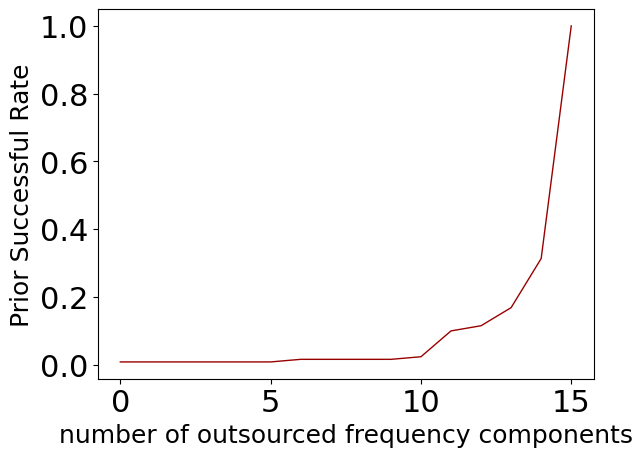

In [60]:
import matplotlib.pyplot as plt
(row, col) = np.nonzero(l2_norm_expression_list_overall)
l2_norm_non_zero_expression_list_overall = l2_norm_expression_list_overall[row, col]

x = [i for i in range(len(prior_successful_rate_list))]
prior_successful_rate_list = prior_successful_rate_list[::-1]
plt.plot(x, prior_successful_rate_list, c="#990000", linewidth=1)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Prior Successful Rate", fontsize=SMALL_SIZE)
plt.xlabel("number of outsourced frequency components", fontsize=SMALL_SIZE)
# plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alveo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.savefig('prior_successful_rate.pdf', bbox_inches="tight", transparent=True) 

plt.show()